IMPORT STATEMENTS AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# dataset preparation

from tensorflow.keras import datasets,layers,models

(train_images,train_labels) , (test_images,test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be within 0 , 1
train_images , test_images = train_images/255.0 , test_images/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = np.reshape(train_images, train_images.shape + (1,))
test_images = np.reshape(test_images, test_images.shape + (1,))

train_images[0].shape

(28, 28, 1)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1446 - accuracy: 0.9548 - val_loss: 0.0558 - val_accuracy: 0.9816
Epoch 2/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0568 - val_accuracy: 0.9824
Epoch 3/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0249 - val_accuracy: 0.9910
Epoch 4/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0326 - val_accuracy: 0.9899
Epoch 5/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0429 - val_accuracy: 0.9867
Epoch 6/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 7/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0337 -

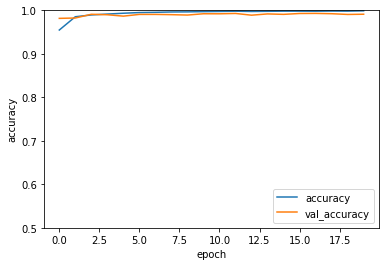

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

plt.show()

In [ ]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 3s - loss: 0.0504 - accuracy: 0.9911
